In [7]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.datasets import load_breast_cancer
from xgboost import XGBClassifier
import graphviz

# Load the Breast Cancer Wisconsin dataset
breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target
feature_names = breast_cancer.feature_names


In [8]:
# Convert the data to a Pandas DataFrame for easier analysis
df = pd.DataFrame(data=X, columns=feature_names)
df['target'] = y

# Overview of the dataset
print(df.head())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [9]:
# Summary statistics
print(df.describe())


       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

In [10]:
# Check for missing values
print(df.isnull().sum())

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


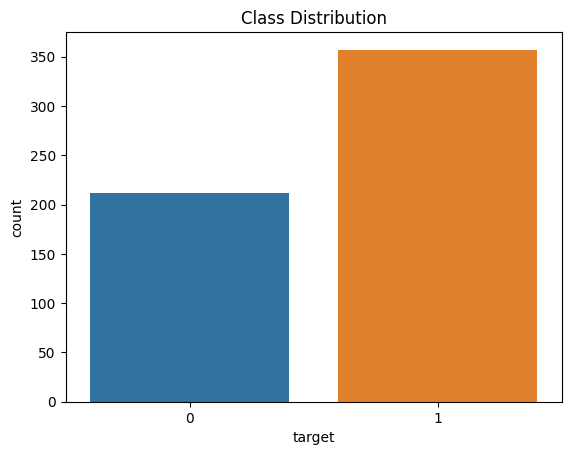

In [11]:
# Visualize class distribution
sns.countplot(x='target', data=df)
plt.title('Class Distribution')
plt.show()


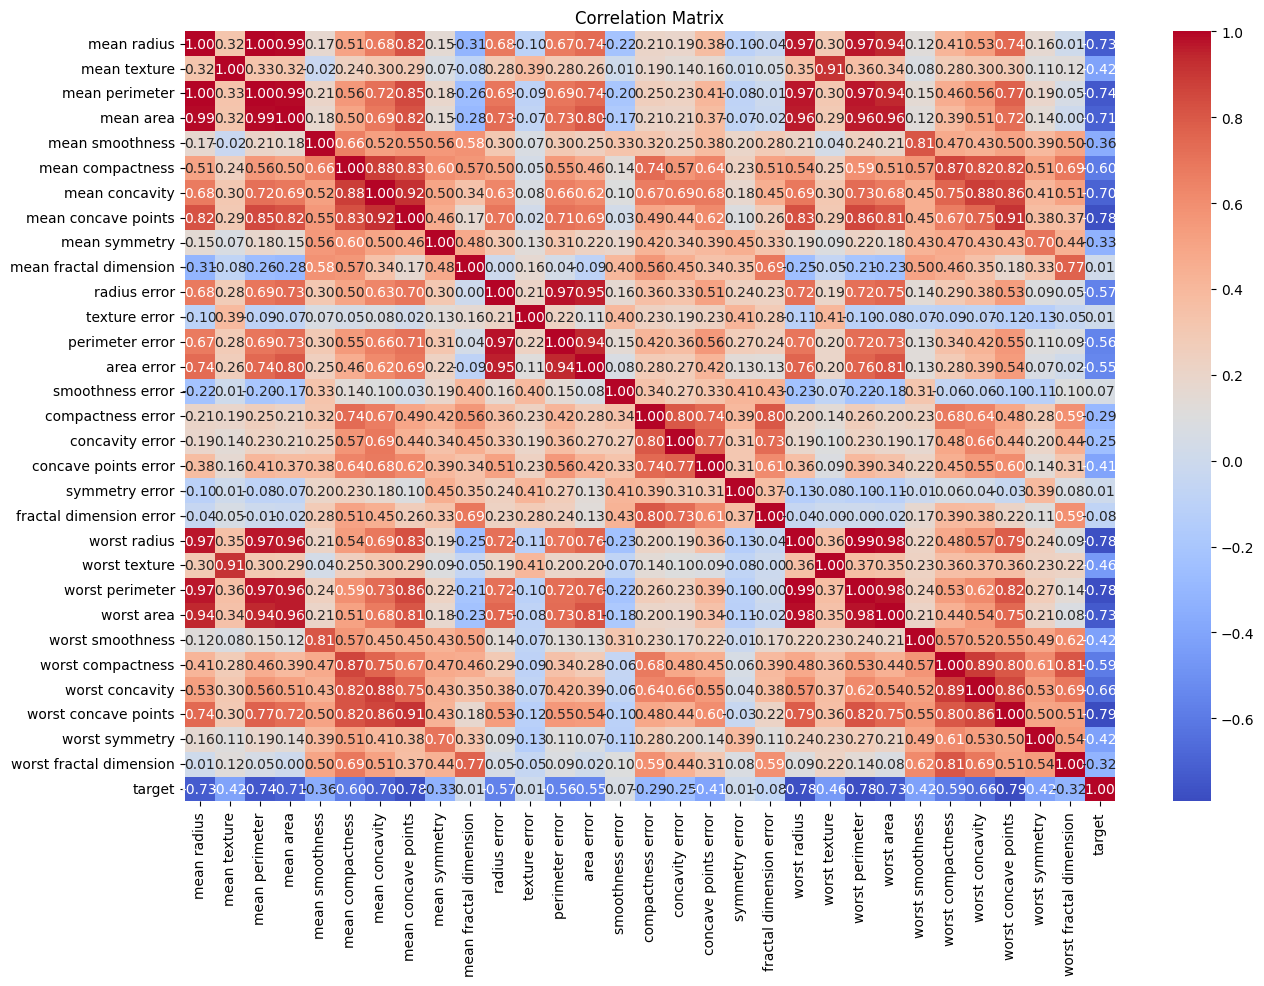

In [12]:
# Visualize correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

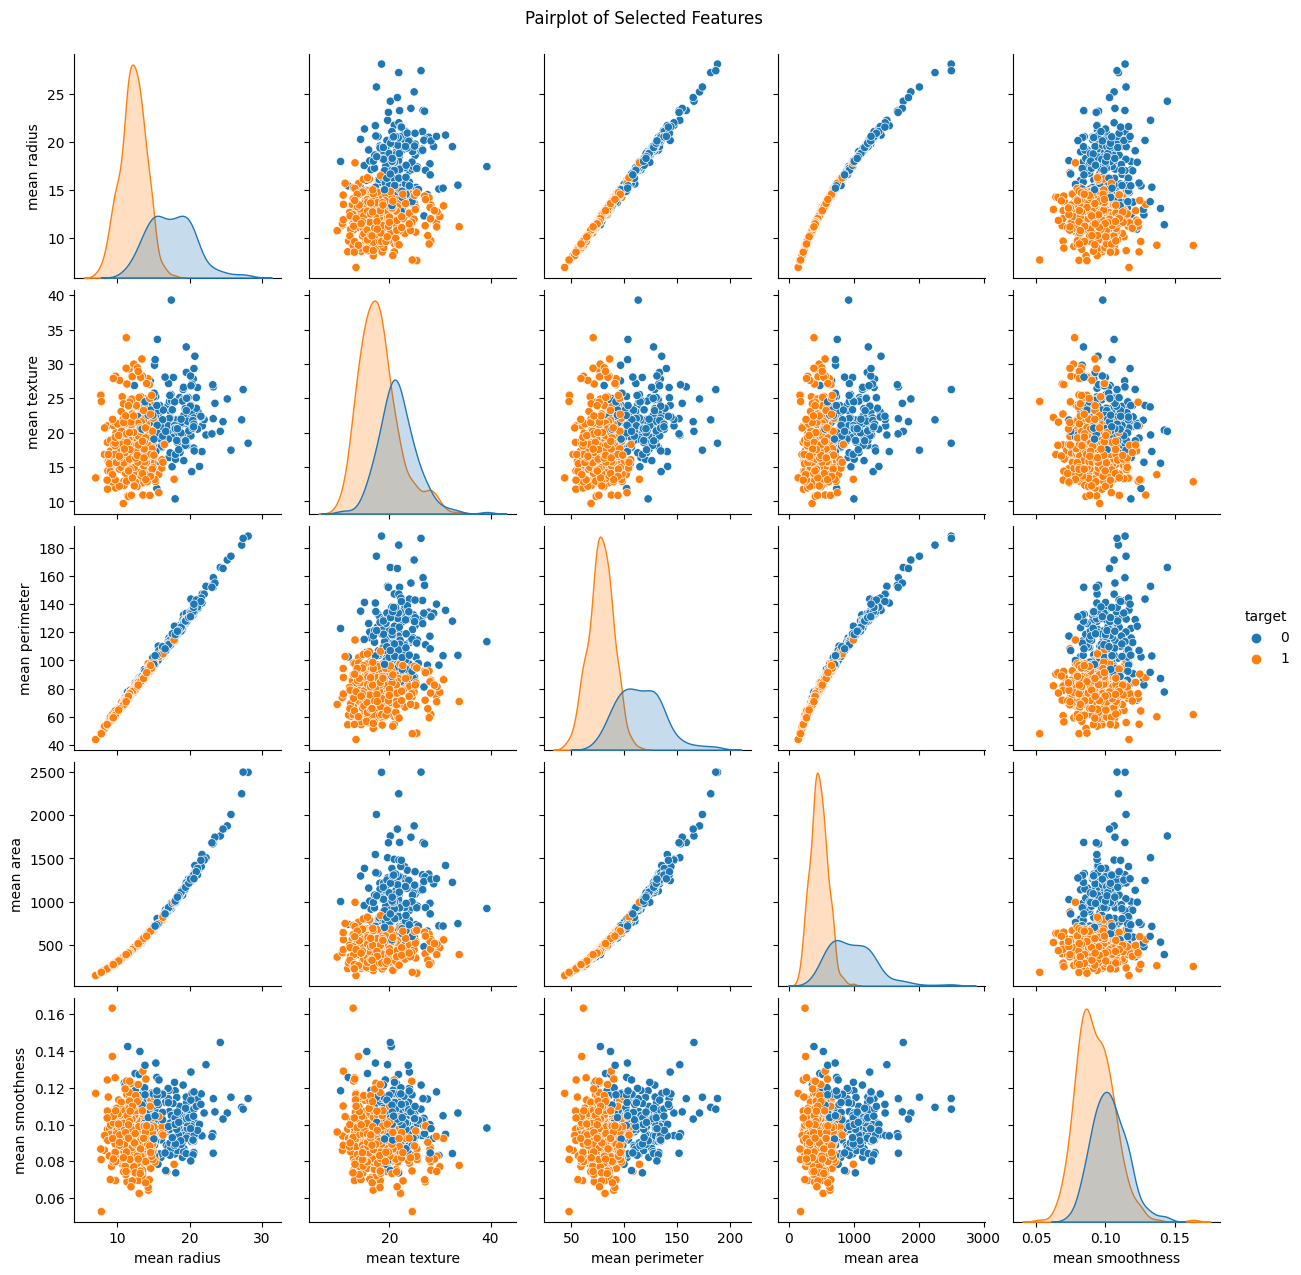

In [13]:
# Pairplot for selected features
selected_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']
sns.pairplot(df[selected_features + ['target']], hue='target', diag_kind='kde')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

In [14]:
# Load the Breast Cancer Wisconsin dataset
breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target

In [15]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# Decision Tree Implementation
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [17]:
# Visualize the decision tree
tree_rules = export_text(decision_tree, feature_names=list(breast_cancer.feature_names))
print("Decision Tree Rules:\n", tree_rules)

Decision Tree Rules:
 |--- mean concave points <= 0.05
|   |--- worst radius <= 16.83
|   |   |--- area error <= 48.70
|   |   |   |--- worst smoothness <= 0.18
|   |   |   |   |--- smoothness error <= 0.00
|   |   |   |   |   |--- worst texture <= 27.76
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- worst texture >  27.76
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- smoothness error >  0.00
|   |   |   |   |   |--- worst texture <= 33.35
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- worst texture >  33.35
|   |   |   |   |   |   |--- worst texture <= 33.56
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- worst texture >  33.56
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |--- worst smoothness >  0.18
|   |   |   |   |--- class: 0
|   |   |--- area error >  48.70
|   |   |   |--- concavity error <= 0.02
|   |   |   |   |--- class: 0
|   |   |   |--- concavity error >  0.02
|   |   |   |   |--- class: 1
|   |-

In [18]:
# Evaluate the decision tree
y_pred_dt = decision_tree.predict(X_test)
print("Decision Tree Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))

Decision Tree Metrics:
Accuracy: 0.9473684210526315
Precision: 0.9577464788732394
Recall: 0.9577464788732394
F1 Score: 0.9577464788732394


In [19]:
# Part 2: Bagging
# Bootstrap Sampling
n_bootstrap_samples = 10
bootstrap_samples = [np.random.choice(len(X_train), len(X_train), replace=True) for _ in range(n_bootstrap_samples)]

In [20]:
# Model Training and Aggregation
bagged_predictions = np.zeros_like(y_test, dtype=float)
for bootstrap_sample in bootstrap_samples:
    bagging_tree = DecisionTreeClassifier(random_state=42)
    bagging_tree.fit(X_train[bootstrap_sample], y_train[bootstrap_sample])
    bagged_predictions += bagging_tree.predict(X_test)

bagged_predictions /= n_bootstrap_samples
bagged_predictions = np.round(bagged_predictions).astype(int)

In [21]:
# Evaluate Bagging
print("\nBagging Metrics:")
print("Accuracy:", accuracy_score(y_test, bagged_predictions))
print("Precision:", precision_score(y_test, bagged_predictions))
print("Recall:", recall_score(y_test, bagged_predictions))
print("F1 Score:", f1_score(y_test, bagged_predictions))



Bagging Metrics:
Accuracy: 0.956140350877193
Precision: 0.9583333333333334
Recall: 0.971830985915493
F1 Score: 0.965034965034965


In [22]:
# Part 3: Random Forest
# Model Implementation
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:
# Feature Importance
feature_importance = random_forest.feature_importances_
top_features = np.argsort(feature_importance)[::-1][:5]
print("\nTop 5 Features based on Random Forest Importance:")
for i, feature_index in enumerate(top_features):
    print(f"{i + 1}. {breast_cancer.feature_names[feature_index]}: {feature_importance[feature_index]}")



Top 5 Features based on Random Forest Importance:
1. worst area: 0.15389236463205394
2. worst concave points: 0.14466326620735528
3. mean concave points: 0.10620998844591638
4. worst radius: 0.07798687515738047
5. mean concavity: 0.06800084191430111


In [28]:
# Feature Importance Plot
import plotly.express as px

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': breast_cancer.feature_names,
    'Importance': feature_importance
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
fig = px.bar(
    feature_importance_df,
    x='Importance',
    y='Feature',
    orientation='h',
    title='Random Forest Feature Importance',
    labels={'Importance': 'Importance Score', 'Feature': 'Feature Name'},
    height=400
)

fig.show()

In [24]:
# Evaluate Random Forest
y_pred_rf = random_forest.predict(X_test)
print("\nRandom Forest Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))


Random Forest Metrics:
Accuracy: 0.9649122807017544
Precision: 0.958904109589041
Recall: 0.9859154929577465
F1 Score: 0.9722222222222222


In [25]:
# Part 4: Gradient Boosting (XGBoost)
# XGBoost Implementation
xgb_model = XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [26]:
# Feature Importance with XGBoost
importances = xgb_model.feature_importances_
top_features_xgb = np.argsort(importances)[::-1][:5]
print("\nTop 5 Features based on XGBoost Importance:")
for i, feature_index in enumerate(top_features_xgb):
    print(f"{i + 1}. {breast_cancer.feature_names[feature_index]}: {importances[feature_index]}")

# Evaluate XGBoost
y_pred_xgb = xgb_model.predict(X_test)
print("\nXGBoost Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))



Top 5 Features based on XGBoost Importance:
1. mean concave points: 0.30098971724510193
2. worst concave points: 0.18999728560447693
3. worst perimeter: 0.16177791357040405
4. worst radius: 0.05689222365617752
5. worst area: 0.035500723868608475

XGBoost Metrics:
Accuracy: 0.956140350877193
Precision: 0.9583333333333334
Recall: 0.971830985915493
F1 Score: 0.965034965034965


In [30]:
# Performance Metrics
models = ['Decision Tree', 'Bagging', 'Random Forest', 'XGBoost']
accuracy = [accuracy_score(y_test, y_pred_dt),
            accuracy_score(y_test, bagged_predictions),
            accuracy_score(y_test, y_pred_rf),
            accuracy_score(y_test, y_pred_xgb)]

precision = [precision_score(y_test, y_pred_dt),
              precision_score(y_test, bagged_predictions),
              precision_score(y_test, y_pred_rf),
              precision_score(y_test, y_pred_xgb)]

recall = [recall_score(y_test, y_pred_dt),
           recall_score(y_test, bagged_predictions),
           recall_score(y_test, y_pred_rf),
           recall_score(y_test, y_pred_xgb)]

f1 = [f1_score(y_test, y_pred_dt),
      f1_score(y_test, bagged_predictions),
      f1_score(y_test, y_pred_rf),
      f1_score(y_test, y_pred_xgb)]



Performance Metrics Table:
+---------------+--------------------+--------------------+--------------------+--------------------+
|     Model     |      Accuracy      |     Precision      |       Recall       |      F1 Score      |
+---------------+--------------------+--------------------+--------------------+--------------------+
| Decision Tree | 0.9473684210526315 | 0.9577464788732394 | 0.9577464788732394 | 0.9577464788732394 |
|    Bagging    | 0.956140350877193  | 0.9583333333333334 | 0.971830985915493  | 0.965034965034965  |
| Random Forest | 0.9649122807017544 | 0.958904109589041  | 0.9859154929577465 | 0.9722222222222222 |
|    XGBoost    | 0.956140350877193  | 0.9583333333333334 | 0.971830985915493  | 0.965034965034965  |
+---------------+--------------------+--------------------+--------------------+--------------------+


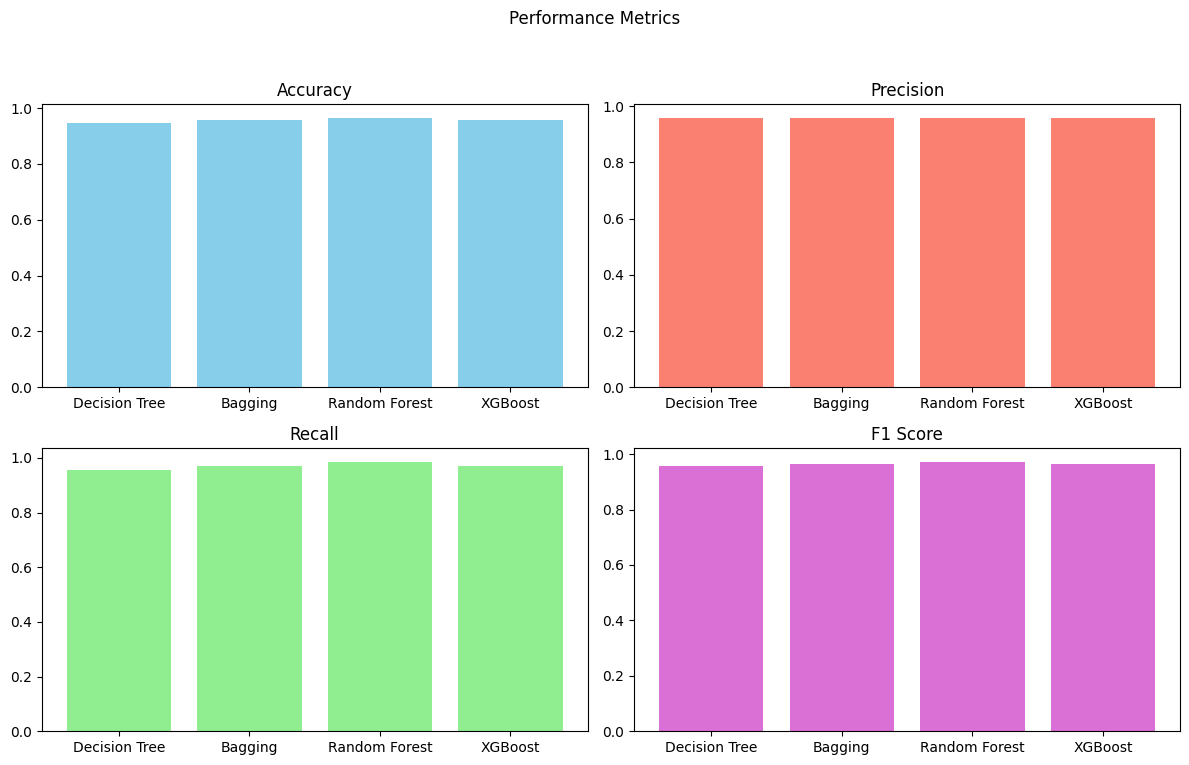

In [32]:
from tabulate import tabulate
# Metric Table
metrics_data = {'Model': models, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}
metrics_df = pd.DataFrame(metrics_data)
print("\nPerformance Metrics Table:")
print(tabulate(metrics_df, headers='keys', tablefmt='pretty', showindex=False))

# Metric Graphs
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Performance Metrics')

ax[0, 0].bar(models, accuracy, color='skyblue')
ax[0, 0].set_title('Accuracy')

ax[0, 1].bar(models, precision, color='salmon')
ax[0, 1].set_title('Precision')

ax[1, 0].bar(models, recall, color='lightgreen')
ax[1, 0].set_title('Recall')

ax[1, 1].bar(models, f1, color='orchid')
ax[1, 1].set_title('F1 Score')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Performance Report:
1. Decision Tree:

Accuracy: 94.74%
Precision: 95.77%
Recall: 95.77%
F1 Score: 95.77%
Observations:

Decent performance with balanced precision and recall.
Suitable for quick and interpretable insights.
2. Bagging:

Accuracy: 95.61%
Precision: 95.83%
Recall: 97.18%
F1 Score: 96.50%
Observations:

Improved accuracy and recall compared to the Decision Tree.
Effective when diverse models are needed.
3. Random Forest:

Accuracy: 96.49%
Precision: 95.89%
Recall: 98.59%
F1 Score: 97.22%
Observations:

Robust performance with high accuracy, precision, and recall.
Suitable for a balanced and reliable model.
4. XGBoost:

Accuracy: 95.61%
Precision: 95.83%
Recall: 97.18%
F1 Score: 96.50%
Observations:

Comparable performance to Bagging.
Useful for large datasets and complex relationships.
Model Preferences:
Decision Tree:
Prefer in situations where interpretability is crucial.
Quick insights and easy visualization.
Bagging:
Suitable when model diversity is essential.
Improved performance over a single Decision Tree.
Random Forest:
Robust performance and high accuracy.
Preferred for a balanced and reliable model.
XGBoost:
Effective for large datasets and complex relationships.
Comparable performance to Bagging.
Challenges Faced:
Interpretability:
Random Forest and XGBoost models are less interpretable due to their ensemble nature.
Balancing interpretability with performance is a challenge.
Hyperparameter Tuning:
Fine-tuning hyperparameters for Bagging and XGBoost is crucial for optimal performance.
Requires careful experimentation and validation.
Model Selection:
Choosing the best model depends on the specific requirements and trade-offs.
Balancing accuracy, interpretability, and computational efficiency.
Conclusion:
The models were evaluated on the Breast Cancer Wisconsin dataset, and each demonstrated strengths in different aspects. Decision Tree and Bagging are suitable for interpretability and diverse models, while Random Forest excels in overall robustness. XGBoost, with its boosting technique, offers competitive performance in complex scenarios. The choice of the model depends on the specific goals and considerations of the application.